In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mash import MASH
from sampler import sample_bloch, sample_p
from polylib.PES.diabatic import Tully
from polylib.PES.nonadiabatic import TwoLevelAdiabaticRepresentation
from polylib import units

In [3]:
pes = Tully()
adiab = TwoLevelAdiabaticRepresentation(pes)
xs = np.linspace(-5, 5, 100)
Vs_diab = np.array([pes.potential(x) for x in xs])
Vs_adiab = np.array([adiab.potential(x) for x in xs])

In [15]:
t_total = 150e-15 / units.atomic.time 
dt = 2 
steps = 500

m = 2000
num_samples = 20
WPP_list = []  # List to store weights for each iteration

x = []
p = []
S = []
e = []

x2 = []
p2 = []
S2 = []
e2 = []

x3 = []
p3 = []
S3 = []
e3 = []

x4 = []
p4 = []
S4 = []
e4 = []

for i in range(num_samples):
    
    x_init = -4
    p_init =  20
    #sample_p(0.1,np.sqrt(2*m*0.1))
    S_init = sample_bloch()
    S_init[2] = -np.abs(S_init[2])
    # print (S_init, p_init)
    S_init /= np.linalg.norm(S_init) # normalise because numerical method
    
    V = adiab.potential(x_init)
    Vz = (V[1] - V[0]) / 2
    Vbar = (V[1] + V[0]) / 2

    e_init = p_init**2/(2*m) + Vbar + Vz*np.sign(S_init[2])

    
    masher = MASH(adiab, dt, m)
    masher.set_xpS(x_init, p_init, S_init, e_init)
    WPP = 2 * np.abs(S_init[2])  # Weighting factor for histogram
    # calculates forward and reverse trajectory using symmetric method
    xts, pts, Sts, ets = masher.trajectory(steps, 'symmetric')
    x.append(xts)
    p.append(pts)
    S.append(Sts)
    e.append(ets)

    # masher2 = MASH(adiab, -dt, m)
    # masher2.set_xpS(xts[-1], pts[-1], Sts[-1], ets[-1])
    # xts2, pts2, Sts2, ets2 = masher2.trajectory(steps, 'symmetric')
    # x2.append(xts2)
    # p2.append(pts2)
    # S2.append(Sts2)
    # e2.append(ets2)

    # calculates forward and reverse trajectory using asymmetric method      
    masher3 = MASH(adiab, dt, m)
    masher3.set_xpS(x_init, p_init, S_init, e_init)
    WPP = 2 * np.abs(S_init[2])  # Weighting factor for histogram
    xts3, pts3, Sts3, ets3 = masher3.trajectory(steps, 'verlet,spin')
    x3.append(xts3)
    p3.append(pts3)
    S3.append(Sts3)
    e3.append(ets3)

    # masher4 = MASH(adiab, -dt, m)
    # masher4.set_xpS(xts3[-1], pts3[-1], Sts3[-1], ets3[-1])
    # xts4, pts4, Sts4, ets4 = masher4.trajectory(steps, 'verlet,spin')
    # x4.append(xts4)
    # p4.append(pts4)
    # S4.append(Sts4)
    # e4.append(ets4)

    WPP_list.append(WPP)

x = np.array(x)
p = np.array(p)
S = np.array(S)
e = np.array(e)

# x2 = np.array(x2)
# p2 = np.array(p2)
# S2 = np.array(S2)
# e2 = np.array(e2)

x3 = np.array(x3)
p3 = np.array(p3)
S3 = np.array(S3)
e3 = np.array(e3)

# x4 = np.array(x4)
# p4 = np.array(p4)
# S4 = np.array(S4)
# e4 = np.array(e4)

--------------
step  1
--------------
step  2
--------------
step  3
--------------
step  4
--------------
step  5
--------------
step  6
--------------
step  7
--------------
step  8
--------------
step  9
--------------
step  10
--------------
step  11
--------------
step  12
--------------
step  13
--------------
step  14
--------------
step  15
--------------
step  16
--------------
step  17
--------------
step  18
--------------
step  19
--------------
step  20
--------------
step  21
--------------
step  22
--------------
step  23
--------------
step  24
--------------
step  25
--------------
step  26
--------------
step  27
--------------
step  28
--------------
step  29
--------------
step  30
--------------
step  31
--------------
step  32
--------------
step  33
--------------
step  34
--------------
step  35
--------------
step  36
--------------
step  37
--------------
step  38
--------------
step  39
--------------
step  40
--------------
step  41
--------------
step  42
-

In [16]:
'correlation function'


x0_x_i =np.mean( x* x[:,0, None]*2 * np.abs(S[:, 0, 2, None]), axis=0)
p0_p_i = np.mean( p* p[:,0, None]*2 * np.abs(S[:, 0, 2,None]), axis=0)
e0_e_i =np.mean( e* e[:,0, None]*2 * np.abs(S[:, 0, 2,None]), axis=0)

x0_x_i3 =np.mean( x3* x3[:,0, None]*2 * np.abs(S[:, 0, 2, None]), axis=0)
p0_p_i3 = np.mean( p3* p3[:,0, None]*2 * np.abs(S[:, 0, 2,None]), axis=0)
e0_e_i3 =np.mean( e3* e3[:,0, None]*2 * np.abs(S[:, 0, 2,None]), axis=0)

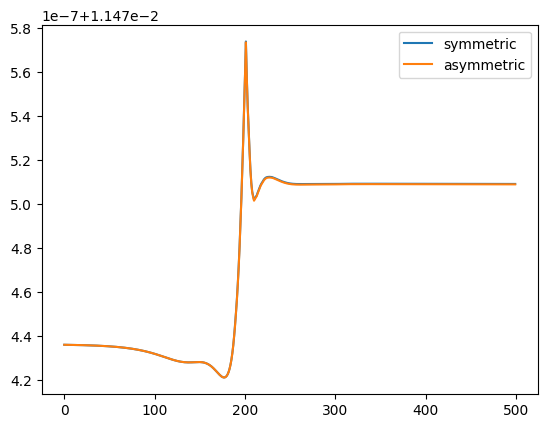

In [17]:
plt.plot(e0_e_i, label ='symmetric')
plt.plot(e0_e_i3, label ='asymmetric')
plt.legend()

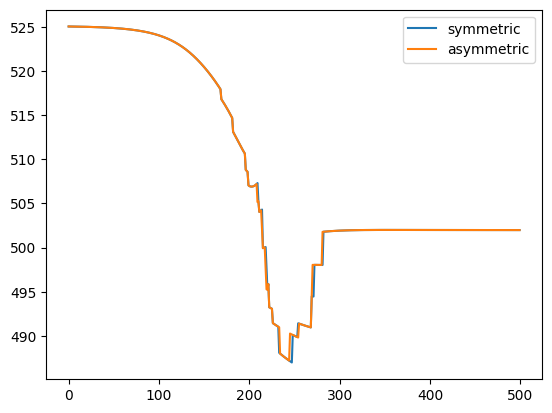

In [14]:
plt.plot(p0_p_i, label ='symmetric')
plt.plot(p0_p_i3, label ='asymmetric')
plt.legend()

In [ ]:
fig = plt.figure(figsize=(15, 10))
plt.subplot(341)
plt.plot(p.T, color='black', alpha=0.5, label='forward')
plt.plot(p2[:, ::-1].T, color='red', alpha=0.5, ls='--', label='backward')
plt.ylabel ('p')
plt.title('momentum symmetric method')
plt.legend()

plt.subplot(342)
plt.plot(S[:, :, 2].T, color='black', alpha=0.5)
plt.plot(S2[:, ::-1, 2].T, color='red', alpha=0.5, ls='--')
plt.xlabel('time steps')
plt.ylabel('Sz')
plt.title('Spin symmetric method')

plt.subplot(343)  
plt.plot(x.T, color='black', alpha=0.5)
plt.plot(x2[:, ::-1].T, color='red', alpha=0.5, ls='--')
plt.xlabel('time steps')
plt.ylabel('q')
plt.title('q symmetric method')

# plt.hist(p_final, bins=1000, weights=WPP_list) # weight according to Sz
# plt.xlim(15, 25)
# plt.xlabel('time steps')
# plt.ylabel ('histogram momentum')

plt.subplot(344)
plt.plot(e.T, label='analytic', color='black', alpha=0.5)
plt.plot(e2[:, ::-1].T, label='analytic', color='red', alpha=0.5, ls='--')
plt.xlabel('time steps')
plt.ylabel ('energy')
plt.title('energy symmetric method')


plt.subplot(345)
plt.plot(p3.T, color='black', alpha=0.5)
plt.plot(p4[:, ::-1].T, color='red', alpha=0.5, ls='--')
plt.ylabel ('p')
plt.title('momentum asymmetric method')

plt.subplot(346)
plt.plot(S3[:, :, 2].T, color='black', alpha=0.5)
plt.plot(S4[:, ::-1, 2].T, color='red', alpha=0.5, ls='--')
plt.xlabel('time steps')
plt.ylabel('Sz')
plt.title('Spin asymmetric method')

plt.subplot(347)  
plt.plot(x3.T, color='black', alpha=0.5)
plt.plot(x4[:, ::-1].T, color='red', alpha=0.5, ls='--')
plt.xlabel('time steps')
plt.ylabel('q')
plt.title('q asymmetric method')

plt.subplot(348)
plt.plot(e3.T, label='analytic', color='black', alpha=0.5)
plt.plot(e4[:, ::-1].T, label='analytic', color='red', alpha=0.5, ls='--')
plt.xlabel('time steps')
plt.ylabel ('energy')
plt.title('energy asymmetric method')

plt.subplot(3,4,9)
plt.plot((p - p2[:, ::-1]).T, label='symmetric')
plt.plot((p3 - p4[:, ::-1]).T, label='asymmetric')
plt.xlabel('time steps')
plt.ylabel ('Delta p')
plt.title('difference in p between backward and forward')
plt.legend()

plt.subplot(3,4,10)
plt.plot((S[..., 2] - S2[:, ::-1, 2]).T)
plt.plot((S3[..., 2] - S4[:, ::-1, 2]).T)
plt.xlabel('time steps')
plt.ylabel ('Delta Sz')
plt.title('difference in Sz between backward and forward')

plt.subplot(3,4,11)  
plt.plot((S[:, :, 0] - S2[:, ::-1, 0]).T)
plt.plot((S3[:, :, 0] - S4[:, ::-1, 0]).T)
plt.xlabel('time steps')
plt.ylabel ('Spin XY')

plt.subplot(3,4,12)
diff = e2[:, ::-1] - e
plt.plot(diff.T, label='analytic')
diff = e4[:, ::-1] - e3
plt.plot(diff.T, label='analytic')
plt.xlabel('time steps')
plt.ylabel ('Delta E')
plt.title('energy conservation')
plt.tight_layout()  # Adjust subplot spacing
plt.show() 

